In [ ]:
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.config import get_cfg
from detectron2 import model_zoo
from PIL import Image
import cv2



# Set up the config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")) # Replace with your config
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # set the number of classes based on your dataset

# Set device to CPU
cfg.MODEL.DEVICE = "cpu"

# Initialize the predictor
predictor = DefaultPredictor(cfg)

# Load an image
image_path = "./" # replace with your image path
im = cv2.imread(image_path)

# Make prediction
outputs = predictor(im)

# Visualize the prediction in the image
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
result_image = v.get_image()[:, :, ::-1]

# Save the output image
cv2.imwrite('output_image.jpg', result_image)


In [4]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from PIL import Image
import cv2

# Set up the config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # set the number of classes based on your dataset

# Set up your metadata with your classes
my_metadata = MetadataCatalog.get("my_dataset")
my_metadata.thing_classes = ["Rooftop", "Solar"]

# Set device to CPU
cfg.MODEL.DEVICE = "cpu"

# Initialize the predictor
predictor = DefaultPredictor(cfg)

# Load an image
image_path = "./img.png" # replace with your image path
im = cv2.imread(image_path)

# Make prediction
outputs = predictor(im)

# Visualize the prediction in the image
v = Visualizer(im[:, :, ::-1], my_metadata, scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
result_image = v.get_image()[:, :, ::-1]

# Save the output image
cv2.imwrite('output_image.jpg', result_image)


True

In [21]:
#Deletador2000
from detectron2.data import DatasetCatalog, MetadataCatalog

# Remove 'my_test_dataset' from DatasetCatalog and MetadataCatalog
if "my_test_dataset" in DatasetCatalog.list():
    DatasetCatalog.remove("my_test_dataset")
    print ("Deletado com sucesso!")
if "my_test_dataset" in MetadataCatalog.list():
    MetadataCatalog.remove("my_test_dataset")
    print ("Deletado com sucesso!")
else:
    print("Não tinha nada...")

Deletado com sucesso!
Deletado com sucesso!


In [11]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances

# Register your test dataset
# Make sure to change the paths and dataset name to match your setup
register_coco_instances("my_test_dataset", {}, "./test/result.json", "./test/images")

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

cfg.MODEL.DEVICE = "cpu"
cfg.DATASETS.TEST = ("my_test_dataset", )

predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_test_dataset", cfg, False, output_dir="./output_test/")
val_loader = build_detection_test_loader(cfg, "my_test_dataset")

inference_on_dataset(predictor.model, val_loader, evaluator)


COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.146
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.282
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.138
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.085
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.043
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.119
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.

OrderedDict([('bbox',
              {'AP': 14.6022888640794,
               'AP50': 28.188695807856266,
               'AP75': 13.77060055068598,
               'APs': 8.461432169019407,
               'APm': 20.518552727057013,
               'APl': 20.49416213055849,
               'AP-Rooftop': 23.741706441030082,
               'AP-Solar': 5.462871287128713}),
             ('segm',
              {'AP': 15.71262496611951,
               'AP50': 28.78999691926214,
               'AP75': 15.794934353979906,
               'APs': 4.7989965960191965,
               'APm': 22.939009564553036,
               'APl': 23.623160799677596,
               'AP-Rooftop': 24.452059756078544,
               'AP-Solar': 6.9731901761604735})])


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



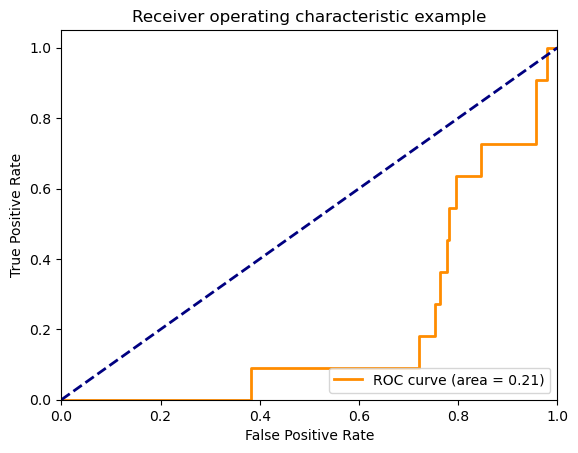

In [12]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.data import DatasetCatalog
import cv2
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.MODEL.DEVICE = "cpu"
cfg.DATASETS.TEST = ("my_test_dataset",)

predictor = DefaultPredictor(cfg)
test_dataset_dicts = DatasetCatalog.get("my_test_dataset")

scores = []
labels = []

for d in test_dataset_dicts:
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    scores.extend(outputs["instances"].scores.tolist())
    labels.extend(outputs["instances"].pred_classes.tolist())

#calcula ROC e imprime
fpr, tpr, _ = roc_curve(labels, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [22]:
import cv2
import numpy as np
from detectron2.structures import BoxMode, pairwise_iou, Boxes
from detectron2.data import MetadataCatalog, DatasetCatalog
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data.datasets import register_coco_instances
from collections import defaultdict
from detectron2 import model_zoo
from detectron2.data import DatasetCatalog
import torch
import os

# Load your trained Detectron2 model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))  # use the config file you used for training
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # this is the trained model file
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # use the same threshold as you used for training
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # this is the number of classes: rooftop and solar panel
cfg.MODEL.DEVICE = "cpu"
predictor = DefaultPredictor(cfg)

# Register your testing dataset in COCO format
# Replace "path_to_your_images" and "path_to_your_json_file" with the actual paths
register_coco_instances("my_test_dataset", {}, "./test/result.json", "./test/images")

# Now that the dataset is registered, let's load it
dataset_dicts = DatasetCatalog.get("my_test_dataset")

all_gt_classes = []
all_tp_masks = []

all_gt_counts = defaultdict(int)
all_tp_counts = defaultdict(int)
all_fp_counts = defaultdict(int)

for d in dataset_dicts:
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)

    # Get the prediction results
    pred_boxes = outputs["instances"].pred_boxes
    pred_classes = outputs["instances"].pred_classes.cpu().numpy()

    # Load the ground truth labels for this image
    gt_boxes = [BoxMode.convert(annotation["bbox"], BoxMode.XYWH_ABS, BoxMode.XYXY_ABS) for annotation in d["annotations"]]
    gt_classes = [annotation["category_id"] for annotation in d["annotations"]]

    # Convert list of gt_boxes into Boxes object for IoU calculation
    gt_boxes = Boxes(torch.stack([torch.tensor(x) for x in gt_boxes]))

    # Calculate Intersection over Union (IoU) for each predicted box
    iou = pairwise_iou(pred_boxes, gt_boxes)

    # Record which ground truth boxes have been matched
    gt_matched = set()

    for c in set(pred_classes):
        # Get the predicted boxes of this class
        class_mask = pred_classes == c
        class_boxes = pred_boxes[class_mask]

        # Get the ground truth boxes of this class
        class_gt_mask = np.array(gt_classes) == c
        class_gt_boxes = [box for i, box in enumerate(gt_boxes) if class_gt_mask[i]]
        if not class_gt_boxes:
            continue

        class_gt_boxes = Boxes(torch.stack(class_gt_boxes))

        # Calculate IoU for this class
        class_iou = pairwise_iou(class_boxes, class_gt_boxes)

        # Count the number of True Positives
        class_tp_mask = class_iou.max(dim=1).values > 0.5
        all_tp_counts[c] += class_tp_mask.sum().item()

        # Record the matched ground truth boxes
        gt_matched.update(class_iou.max(dim=0).indices[class_iou.max(dim=0).values > 0.5].tolist())

        # Count the number of False Positives
        all_fp_counts[c] += (~class_tp_mask).sum().item()

    # Count the number of True Positives and False Negatives for each class
    for c in set(gt_classes):
        all_gt_counts[c] += sum(x == c for x in gt_classes)
    
all_fn_counts = {c: all_gt_counts[c] - all_tp_counts.get(c, 0) for c in all_gt_counts.keys()}

# Calculate precision, recall, and F1 score for each class
for c in set(list(all_gt_counts.keys()) + list(all_tp_counts.keys())):
    tp = all_tp_counts.get(c, 0)
    fp = all_fp_counts.get(c, 0)
    fn = all_fn_counts.get(c, 0)

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    print(f"Class {c}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")



Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Class 0:
Precision: 0.524263431542461
Recall: 0.716824644549763
F1 Score: 0.6056056056056056
Class 1:
Precision: 0.625
Recall: 0.2127659574468085
F1 Score: 0.31746031746031744


In [27]:
#Deletador2000
from detectron2.data import DatasetCatalog, MetadataCatalog

# Remove 'my_test_dataset' from DatasetCatalog and MetadataCatalog
if "my_test_dataset_graph" in DatasetCatalog.list():
    DatasetCatalog.remove("my_test_dataset_graph")
    print ("Deletado com sucesso!")
if "my_test_dataset_graph" in MetadataCatalog.list():
    MetadataCatalog.remove("my_test_dataset_graph")
    print ("Deletado com sucesso!")
else:
    print("Não tinha nada...")

Deletado com sucesso!
Deletado com sucesso!


In [29]:
import cv2
import numpy as np
from detectron2.structures import BoxMode, pairwise_iou, Boxes
from detectron2.data import MetadataCatalog, DatasetCatalog
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data.datasets import register_coco_instances
from collections import defaultdict
from detectron2 import model_zoo
from detectron2.data import DatasetCatalog
import torch
import os
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Load your trained Detectron2 model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))  # use the config file you used for training
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # this is the trained model file
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # use the same threshold as you used for training
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # this is the number of classes: rooftop and solar panel
cfg.MODEL.DEVICE = "cpu"
predictor = DefaultPredictor(cfg)

# Register your testing dataset in COCO format
# Replace "path_to_your_images" and "path_to_your_json_file" with the actual paths
register_coco_instances("my_test_dataset_graph", {}, "./test/result.json", "./test/images")

# Now that the dataset is registered, let's load it
dataset_dicts = DatasetCatalog.get("my_test_dataset_graph")

all_gt_classes = []
all_tp_masks = []

all_gt_counts = defaultdict(int)
all_tp_counts = defaultdict(int)
all_fp_counts = defaultdict(int)

scores_rooftop = []
scores_solar = []
labels_rooftop = []
labels_solar = []

for d in dataset_dicts:
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)

    pred_boxes = outputs["instances"].pred_boxes
    pred_classes = outputs["instances"].pred_classes.cpu().numpy()

    scores = outputs["instances"].scores.cpu().numpy()
    labels = outputs["instances"].pred_classes.cpu().numpy()

    gt_boxes = [BoxMode.convert(annotation["bbox"], BoxMode.XYWH_ABS, BoxMode.XYXY_ABS) for annotation in d["annotations"]]
    gt_classes = [annotation["category_id"] for annotation in d["annotations"]]

    gt_boxes = Boxes(torch.stack([torch.tensor(x) for x in gt_boxes]))

    iou = pairwise_iou(pred_boxes, gt_boxes)


    for c in set(pred_classes):
        class_mask = pred_classes == c
        class_boxes = pred_boxes[class_mask]
        class_scores = scores[class_mask]

        class_gt_mask = np.array(gt_classes) == c
        class_gt_boxes = [box for i, box in enumerate(gt_boxes) if class_gt_mask[i]]
        if not class_gt_boxes:
            continue

        class_gt_boxes = Boxes(torch.stack(class_gt_boxes))
        class_iou = pairwise_iou(class_boxes, class_gt_boxes)

        # Find matches based on highest IoU
        iou_max_values, iou_max_indices = class_iou.max(dim=1).values, class_iou.max(dim=1).indices

        # We only add the prediction scores if they have IoU > 0.5 (i.e., considered a valid match)
        valid_mask = iou_max_values > 0.5
        if c == 0:  # Assuming rooftop class is 0
            if len(class_scores[valid_mask]) > 0:  # Added this condition
                scores_rooftop.extend(class_scores[valid_mask])
                labels_rooftop.extend([1] * valid_mask.sum().item())
        else:  # Assuming solar panel class is 1
            if len(class_scores[valid_mask]) > 0:  # Added this condition
                scores_solar.extend(class_scores[valid_mask])
                labels_solar.extend([1] * valid_mask.sum().item())


    for c in set(gt_classes):
        all_gt_counts[c] += sum(x == c for x in gt_classes)
    
all_fn_counts = {c: all_gt_counts[c] - all_tp_counts.get(c, 0) for c in all_gt_counts.keys()}

for c in set(list(all_gt_counts.keys()) + list(all_tp_counts.keys())):
    tp = all_tp_counts.get(c, 0)
    fp = all_fp_counts.get(c, 0)
    fn = all_fn_counts.get(c, 0)

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    print(f"Class {c}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

scores_rooftop = np.array(scores_rooftop)
scores_solar = np.array(scores_solar)
labels_rooftop = np.array(labels_rooftop)
labels_solar = np.array(labels_solar)

precision_rooftop, recall_rooftop, _ = precision_recall_curve(labels_rooftop, scores_rooftop)
precision_solar, recall_solar, _ = precision_recall_curve(labels_solar, scores_solar)

plt.figure()
plt.step(recall_rooftop, precision_rooftop, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for rooftop class')
plt.show()

plt.figure()
plt.step(recall_solar, precision_solar, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for solar panel class')
plt.show()



Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



IndexError: index 1 is out of bounds for axis 0 with size 1